# B1. Proba voluntaria: sin diferenciar materias de modalidad

En este apartado se presenta un análisis de los resultados obtenidos a partir del **conjunto completo de calificaciones correspondientes a todos los estudiantes y materias evaluadas en la fase voluntaria**. El total de registros analizados asciende a 99 calificaciones (n = 99).

## 1. Obtención de los datos

Cargamos los datos desde un archivo Excel y se muestran todos los datos.

In [18]:
import pandas as pd
# Cargar los datos desde un archivo Excel
df_calificaciones = pd.read_excel('proba_voluntaria.xlsx')
# Mostrar las primeras filas del DataFrame
display(df_calificaciones)

,Número\nInscrición,DNI,Apelidos,Nome,Cod. Mat. Opt. 1,Mat. Opt. 1,Cualif. Mat Opt. 1,Apto 1,Cod. Mat. Opt. 2,Mat. Opt. 2,Cualif. Mat Opt. 2,Apto 2,Cod. Mat. Opt. 3,Mat. Opt. 3,Cualif. Mat Opt. 3,Apto 3
0,4449-001,35641492W,ÁLVAREZ GRAÑA,ERIC,62,Francés,2.5,Non apto,81.0,Coro e Técnica Vocal II,9,Apto,NaN,NaN,NaN,NaN
1,4449-002,77681389Q,AMMI GUAROUACH,ZARA,33,Historia da Arte,3.25,Non apta,35.0,Xeografía,Non presentada,NaN,62.0,Francés,5,Apta
2,4449-003,77548365R,ARIAS PORTELA,JOSÉ,23,Física,Non presentado,NaN,26.0,Tecnoloxía e Enxeñaría II,10,Apto,40.0,Matemáticas Ap. ás CCSS,6.25,Apto
3,4449-005,77479961E,CABO SENRA,MARTÍN,23,Física,3.25,Non apto,26.0,Tecnoloxía e Enxeñaría II,7.75,Apto,40.0,Matemáticas Ap. ás CCSS,7.5,Apto
4,4449-006,53862596T,CALVIÑO ALMAZÁN,PATRICIA,21,Bioloxía,10,Apta,24.0,Química,8.5,Apta,NaN,NaN,NaN,NaN
5,4449-007,54383404L,CALVIÑO MUÑIZ,ERIKA,21,Bioloxía,5.5,Apta,40.0,Matemáticas Ap. ás CCSS,1.25,Non apta,NaN,NaN,NaN,NaN
6,4449-008,54320110K,CALVO DURÁN,ADÁN,23,Física,5.5,Apto,26.0,Tecnoloxía e Enxeñaría II,7.5,Apto,NaN,NaN,NaN,NaN
7,4449-009,53863241R,CASADO MIRANDA,UXÍA,62,Francés,5.5,Apta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4449-010,49671266Y,CASAL SÁNCHEZ,NURIA,20,Matemáticas II,Non presentada,NaN,21.0,Bioloxía,5.75,Apta,NaN,NaN,NaN,NaN
9,4449-011,77478979Y,CASTRO CANCELA,LAURA,21,Bioloxía,1.5,Non apta,24.0,Química,0.5,Non apta,40.0,Matemáticas Ap. ás CCSS,1,Non apta


## 2. Preparación de los datos

In [19]:
import pandas as pd

# Seleccionar las columnas especificadas
columnas_calificaciones = df_calificaciones[['Cualif. Mat Opt. 1', 'Cualif. Mat Opt. 2', 'Cualif. Mat Opt. 3']]

# Apilar las columnas en una sola serie
datos_apilados = columnas_calificaciones.stack()

# Convertir la serie a un DataFrame
df_calificaciones_limpio = pd.DataFrame(datos_apilados, columns=['Calificaciones'])

# Filtrar las filas con "Non presentado" y "Non presentada"
df_calificaciones_limpio = df_calificaciones_limpio[~df_calificaciones_limpio['Calificaciones'].isin(['Non presentado', 'Non presentada'])]

# Convertir la columna 'Calificaciones' a numérica, convirtiendo errores a NaN
df_calificaciones_limpio['Calificaciones'] = pd.to_numeric(df_calificaciones_limpio['Calificaciones'], errors='coerce')

# Eliminar las filas donde la conversión a numérica falló (valores NaN introducidos por coerce)
df_calificaciones_limpio.dropna(subset=['Calificaciones'], inplace=True)

In [20]:
# Calcular estadísticas descriptivas para el dataframe y transponer el resultado
df_calificaciones_limpio.describe().T

,count,mean,std,min,25%,50%,75%,max
Calificaciones,99.0,5.527778,2.333728,0.0,4.125,5.75,6.875,10.0


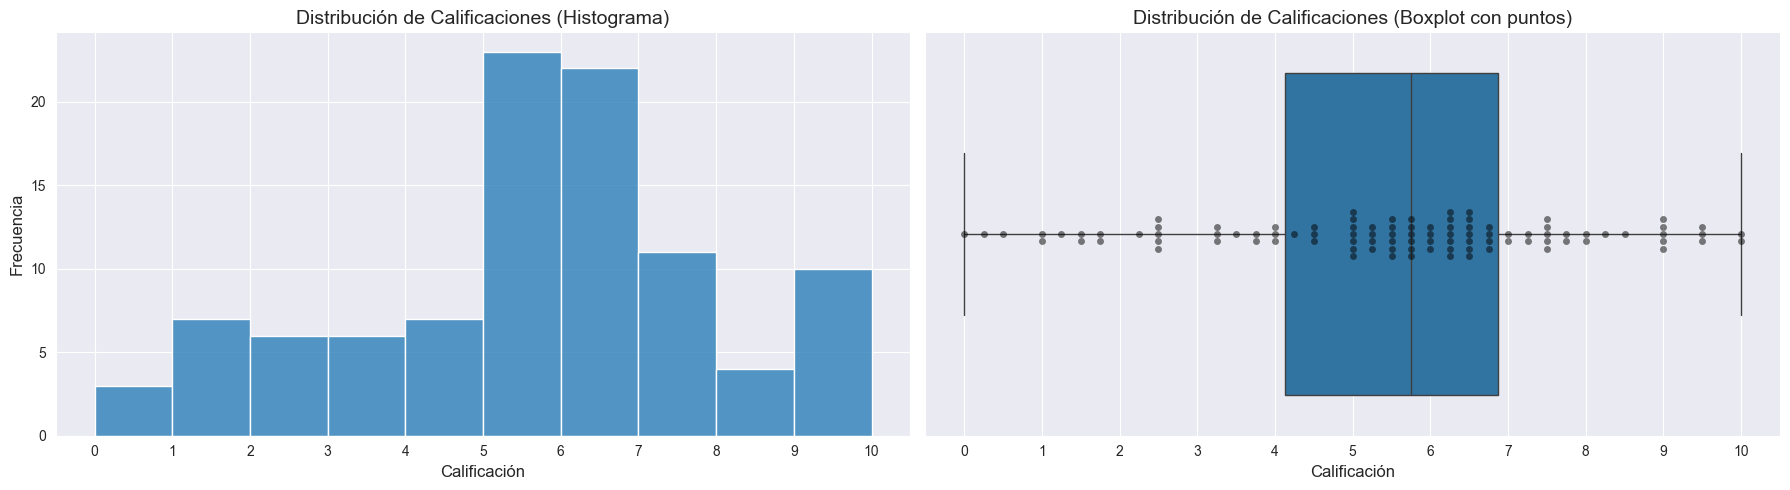

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set_style("darkgrid")

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5)) # 1 fila, 2 columnas

# Crear el histograma en el primer subplot
sns.histplot(data=df_calificaciones_limpio, x='Calificaciones', bins=range(0, 11), kde=False, ax=axes[0])
axes[0].set_title('Distribución de Calificaciones (Histograma)', fontsize=14)
axes[0].set_xlabel('Calificación', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_xticks(range(0, 11))

# Crear el boxplot horizontal con puntos en el segundo subplot
sns.boxplot(data=df_calificaciones_limpio, x='Calificaciones', orient='h', notch=False, ax=axes[1])
sns.swarmplot(data=df_calificaciones_limpio, x='Calificaciones', orient='h', color='black', alpha=0.5, ax=axes[1])
axes[1].set_title('Distribución de Calificaciones (Boxplot con puntos)', fontsize=14)
axes[1].set_xlabel('Calificación', fontsize=12)
axes[1].set_xlim(-0.5, 10.5)
axes[1].set_xticks(range(0, 11))
axes[1].set_yticks([]) # Eliminar el eje y del boxplot horizontal

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

## 3. 📊 Análisis Estadístico

Los principales valores estadísticos de las calificaciones son:

| Estadístico       | Valor |
| ----------------- | ----- |
| Número de datos   | 99    |
| Media (mean)      | 5.53  |
| Desviación típica | 2.33  |
| Mínimo            | 0.0   |
| 1er cuartil (Q1)  | 4.13  |
| Mediana (Q2)      | 5.75  |
| 3er cuartil (Q3)  | 6.88  |
| Máximo            | 10.0  |

* La **media** (5.53) y la **mediana** (5.75) están bastante próximas, lo cual indica una distribución **ligeramente simétrica o levemente sesgada a la izquierda**.
* La **desviación estándar** (2.33) indica que hay **una dispersión moderada** de las calificaciones.
* Hay calificaciones **mínimas de 0** y máximas de **10**, lo que muestra **todo el rango posible** de puntuación.



### 3.1. 📉 Análisis del Histograma

* El histograma muestra una **alta concentración de calificaciones entre 5 y 7**, especialmente alrededor del 6.
* También hay un número significativo de estudiantes con calificaciones **bajas (0-3)**, aunque menos frecuentes.
* Hay una cola más larga hacia la izquierda, lo que sugiere una **asimetría leve negativa** (algunos valores bajos tiran un poco de la media hacia abajo).
* Se observan menos calificaciones en los extremos altos (8-10), aunque sí hay un pequeño grupo que alcanzó la nota máxima.



### 3.2. 📦 Análisis del Boxplot

* El boxplot confirma que la **mayoría de las calificaciones están entre 4,13 (Q1) y 6,88 (Q3)**.
* La mediana está dentro de la caja, lo que refuerza la idea de que **la distribución es casi simétrica**.
* Se observan muchos **puntos individuales fuera del rango intercuartílico**, especialmente hacia calificaciones muy bajas, lo que indica **varios posibles valores atípicos por debajo de 4**.
* Los valores altos (por encima de 8) no se consideran atípicos, ya que no están fuera de los bigotes del boxplot.


### 3.3. ✅ Conclusiones

1. **Rendimiento Medio**: La media de 5,53 sugiere que el rendimiento global fue **ligeramente por encima del aprobado**, aunque con una gran variedad de calificaciones.
2. **Concentración en el aprobado**: El grueso del alumnado se concentra entre 5 y 7 puntos, lo que indica que **la mayoría ha aprobado**, pero sin calificaciones especialmente altas.
3. **Existencia de casos extremos**: Hay varios estudiantes con **calificaciones muy bajas**, incluyendo ceros, que podrían representar **ausencias o trabajos no presentados**.
4. **Distribución levemente sesgada**: Aunque la distribución parece casi simétrica, existe una ligera **asimetría negativa** (más notas bajas que altas extremas).
5. **Variabilidad moderada**: La desviación típica muestra que **hay una dispersión significativa**, por lo que **las calificaciones no están muy agrupadas** alrededor de la media.
